6.25


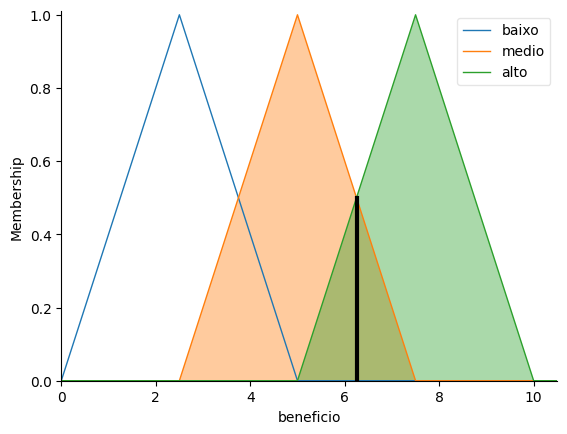

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedente: Entrada do Sistema = Input.
preco = ctrl.Antecedent(np.arange(40000, 100000, 1), 'preco')
consumo = ctrl.Antecedent(np.arange(11, 18, 1), 'consumo')

# Consequente: Saída do Sistema = Output.
beneficio = ctrl.Consequent(np.arange(0, 11, 0.5), 'beneficio')

preco.automf(number=3, names=['baixo', 'medio', 'alto'])
consumo.automf(number=3, names=['alto', 'medio', 'baixo'])

# preco.view()
# consumo.view()

beneficio['baixo'] = fuzz.trimf(beneficio.universe, [0, 2.5, 5])
beneficio['medio'] = fuzz.trimf(beneficio.universe, [2.5, 5, 7.5])
beneficio['alto'] = fuzz.trimf(beneficio.universe, [5, 7.5, 10])

# beneficio.view()

regra1 = ctrl.Rule(preco['baixo'] | consumo['baixo'], beneficio['alto'])
regra2 = ctrl.Rule(preco['baixo'] | consumo['medio'], beneficio['medio'])
regra3 = ctrl.Rule(preco['medio'] | consumo['baixo'], beneficio['medio'])
regra4 = ctrl.Rule(preco['medio'] | consumo['medio'], beneficio['medio'])
regra5 = ctrl.Rule(preco['medio'] | consumo['alto'], beneficio['medio'])
regra6 = ctrl.Rule(preco['alto'] | consumo['medio'], beneficio['medio'])
regra7 = ctrl.Rule(preco['alto'] | consumo['alto'], beneficio['baixo'])
regra8 = ctrl.Rule(preco['baixo'] | consumo['alto'], beneficio['medio'])
regra9 = ctrl.Rule(preco['alto'] | consumo['baixo'], beneficio['medio'])

recomendacao_compra = ctrl.ControlSystem(
    [regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

recomendacao = ctrl.ControlSystemSimulation(recomendacao_compra)

recomendacao.input['preco'] = 50000
recomendacao.input['consumo'] = 100
recomendacao.compute()

print(recomendacao.output['beneficio'])

beneficio.view(sim=recomendacao)
